<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.978 Treball Final de Màster</p>
<p style="margin: 0; text-align:right;">Màster universitari en Ciències de dades (Data science)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudis d'Informàtica, Multimèdia i Telecomunicacions</p>
</div>
</div>
<div style="width: 100%; clear: both;">
<div style="width:100%;">&nbsp;</div>


# PAC 4 - Implementació i desenvolupament del projecte
## #FreeBritney, el cas Britney Spears a Twitter

In [1]:
# Llibreries
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import datetime
import time
import re
import tabulate
from tabulate import tabulate


## Anàlisi descriptiu

In [2]:
# Carguem el joc de dades complert
# Les dades numèriques són identificadors o coordenades. No aplica fer un describe.
df_export = pd.read_csv('export_tw_dataframe_britney.csv', parse_dates=['user.created_at'],low_memory=False)

# Revisem les primeres línias
df_export.head(5)

,created_at,id,id_str,text,truncated,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,...,retweeted_status.quoted_status.place.full_name,retweeted_status.quoted_status.place.country_code,retweeted_status.quoted_status.place.country,retweeted_status.quoted_status.place.contained_within,retweeted_status.quoted_status.place.bounding_box.type,retweeted_status.quoted_status.place.bounding_box.coordinates,geo.type,geo.coordinates,coordinates.type,coordinates.coordinates
0,Sat May 01 08:11:01 +0000 2021,1388405585616547843,1388405585616547843,RT @BritneyHiatus: Exposing Perez Hilton for T...,False,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Sat May 01 08:10:01 +0000 2021,1388405335098990597,1388405335098990597,RT @BritneyHiatus: Rose McGowan even alleged t...,False,"<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Sat May 01 08:09:34 +0000 2021,1388405218946211840,1388405218946211840,RT @Caly314: I feel like @britneyspears SHOULD...,False,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Sat May 01 08:08:45 +0000 2021,1388405014796853253,1388405014796853253,RT @LeanneSimmons: Britney Spears was allegedl...,False,"<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Sat May 01 08:08:37 +0000 2021,1388404979476533251,1388404979476533251,RT @BritneyHiatus: Lady Gaga once responded wh...,False,"<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Revisem el nímero de columnes, de files i també els tipus de dades de totes les columnes
print(df_export.info(verbose=1))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29197 entries, 0 to 29196
Data columns (total 348 columns):
created_at                                                                object
id                                                                        int64
id_str                                                                    int64
text                                                                      object
truncated                                                                 bool
source                                                                    object
in_reply_to_status_id                                                     float64
in_reply_to_status_id_str                                                 float64
in_reply_to_user_id                                                       float64
in_reply_to_user_id_str                                                   float64
in_reply_to_screen_name                                                   object

### Nou joc de dades

Creem un nou joc de dades amb les columnes que farem servir inicialment per al nostre projecte. Algunes variables es faran servir per caracteritzar els usuaris més endavant, d'altres són clau per l'anàlisi de comunitats mitjançant grafs o per l'anàlisi de sentiments.


In [4]:
# Escollim les columnes
fields = ['created_at', 'text','user.screen_name', 'in_reply_to_status_id',
          'retweeted_status.created_at', 'retweeted_status.user.screen_name', 
          'is_quote_status', 'user.location', 'user.description']

# Tornem a llegir la base de dades i transformen el camp created_at per a que tingui format data.
df = pd.read_csv('export_tw_dataframe_britney.csv', parse_dates=['created_at'], usecols=fields, low_memory=False)
df.head(5)

,created_at,text,in_reply_to_status_id,is_quote_status,user.screen_name,user.location,user.description,retweeted_status.created_at,retweeted_status.user.screen_name
0,2021-05-01 08:11:01+00:00,RT @BritneyHiatus: Exposing Perez Hilton for T...,NaN,False,futurehourz,NaN,this year our official stan list is: miley cyr...,Fri Apr 30 20:25:27 +0000 2021,BritneyHiatus
1,2021-05-01 08:10:01+00:00,RT @BritneyHiatus: Rose McGowan even alleged t...,NaN,False,Marjala2,"Santa Maria, CA",NaN,Fri Apr 30 20:26:02 +0000 2021,BritneyHiatus
2,2021-05-01 08:09:34+00:00,RT @Caly314: I feel like @britneyspears SHOULD...,NaN,False,meganyad,NaN,I’m here 😁,Fri Apr 30 15:01:54 +0000 2021,Caly314
3,2021-05-01 08:08:45+00:00,RT @LeanneSimmons: Britney Spears was allegedl...,NaN,False,KatarinaKemzova,Česká republika,NaN,Sat May 01 03:14:38 +0000 2021,LeanneSimmons
4,2021-05-01 08:08:37+00:00,RT @BritneyHiatus: Lady Gaga once responded wh...,NaN,False,Marjala2,"Santa Maria, CA",NaN,Fri Apr 30 20:25:47 +0000 2021,BritneyHiatus


### Evolució temporal dels tuits

C:\Users\lula-\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


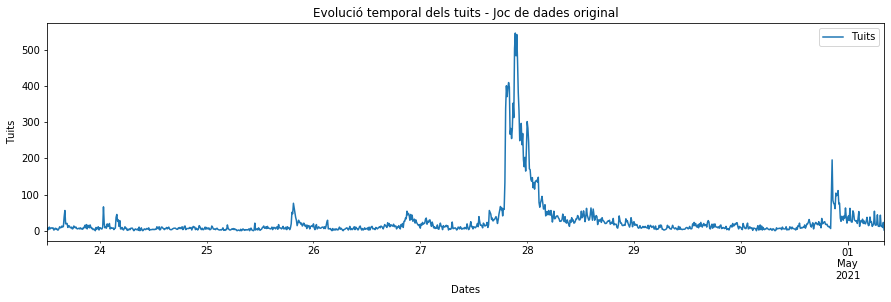

In [5]:
#https://www.dataquest.io/blog/matplotlib-tutorial/

minuts = pd.offsets.Minute(10)

fig, ax = plt.subplots(figsize=(15, 4))

values = df[["created_at"]]

ax = ( values
          .resample(minuts, on='created_at')
          .count()
          .plot.line(ax=ax))

plt.xlabel ('Dates')
plt.ylabel ('Tuits')
plt.title('Evolució temporal dels tuits - Joc de dades original')

L=plt.legend()
L.get_texts()[0].set_text('Tuits')

plt.show()


Revisem el tipus de tuits que tenim.

- Tuit
- Retuit + citat
- Resposta

### Com es distribueixen els tipus d'interacció

In [6]:
total = len (df)
retuits = df['retweeted_status.created_at'].notnull().sum()
repostes = df['in_reply_to_status_id'].notnull().sum() 

print ('El número total de tuits és de',total)
print ('Percentatge de retuits i citats:', 100 * float(retuits)/float(total))
print ('Percentage de respostes de tuits:',  100 * float(repostes)/float(total))
print ('Percentage de tuits inicials', 100 * float(total - (repostes + retuits))/ float(total))

El número total de tuits és de 29197
Percentatge de retuits i citats: 77.60386341062438
Percentage de respostes de tuits: 8.28167277460013
Percentage de tuits inicials 14.11446381477549


### Usuaris que han fet més interaccions

In [7]:
usuaris_interaccions = df['user.screen_name'].value_counts().rename_axis('users').to_frame('freq')
usuaris_interaccions.reset_index(inplace=True)

keys=["nom d'usuari", 'interaccions']
print(tabulate(usuaris_interaccions.head(10), headers=keys, tablefmt='psql', showindex=False))


+-----------------+----------------+
| nom d'usuari    |   interaccions |
|-----------------+----------------|
| FreeBritney___  |            295 |
| Melissa74520031 |            249 |
| Nityalakshmi    |            210 |
| BritneyRadical  |            203 |
| laxjonny_au     |            176 |
| maemaekitten    |            167 |
| biblexcharlotte |            164 |
| popcultnmore    |            164 |
| presscient      |            149 |
| outtathisworl16 |            148 |
+-----------------+----------------+


### Usuaris més retuitats

In [8]:
usuaris_retuitats = df['retweeted_status.user.screen_name'].value_counts().rename_axis('users').to_frame('freq')
usuaris_retuitats.reset_index(inplace=True)

keys=["nom d'usuari", 'retuits rebuts']
print(tabulate(usuaris_retuitats.head(10), headers=keys, tablefmt='psql', showindex=False))


+-----------------+------------------+
| nom d'usuari    |   retuits rebuts |
|-----------------+------------------|
| BritneyHiatus   |             6624 |
| JourneyOctobers |             1610 |
| popcultnmore    |              683 |
| PopBase         |              596 |
| unusuaIbritney  |              437 |
| TheSpearsRoom   |              429 |
| he_plays_sitar  |              337 |
| pieceofandy     |              302 |
| BritneyGoc      |              288 |
| brunolovesbrit  |              285 |
+-----------------+------------------+


### Usuaris interessants

Dels usuaris més retuitats, hi ha 2 que destaquen especialment, però ens quedem amb 4:
- BritneyHiatus
- JourneyOctobers
- popcultnmore
- PopBase

Dels usuaris que més retuits han fet, en destaquen 4, alguns podrien ser bots:
- FreeBritney___
- Melissa74520031
- Nityalakshmi    
- BritneyRadical 

In [9]:


# Columnes interessants suqe ens poden donar informació sobre els usuaris
cols = ['user.screen_name', 'user.description', 'user.created_at', 'user.statuses_count',
        'user.followers_count', 'user.friends_count', 'user.profile_image_url']

# Dades del joc de dades originals
df_users_int = df_export[cols].drop_duplicates(subset=['user.screen_name'])

# Usuaris a estudiar
noms1 = ['BritneyHiatus', 'JourneyOctobers', 'popcultnmore', 'PopBase']
noms2 = ['FreeBritney___', 'Melissa74520031', 'Nityalakshmi', 'BritneyRadical']

# Només els noms seleccionats
df_users_int1 = df_users_int[df_users_int["user.screen_name"].isin(noms1)]
# Modifiquem la data de ceració del compte per quedarnos només amb la data.
df_users_int1['user.created_at'] = pd.to_datetime(df_users_int1['user.created_at']).dt.date

df_users_int1.drop('user.profile_image_url', axis=1)



C:\Users\lula-\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,user.screen_name,user.description,user.created_at,user.statuses_count,user.followers_count,user.friends_count
897,popcultnmore,News & Entertainment.,2021-01-28,1427,280,92
1043,BritneyHiatus,A fan community. Not affiliated with Britney o...,2019-01-05,13432,38280,11562
6599,JourneyOctobers,she/her 💙 | Mental Health | Equality | Feminis...,2020-01-21,19453,413,403
12404,PopBase,Pop Base is your best source for all pop cultu...,2019-06-11,10521,138808,1335


In [10]:
# Usuaris a estudiar

# Només els noms seleccionats
df_users_int2 = df_users_int[df_users_int["user.screen_name"].isin(noms2)]
# Modifiquem la data de ceració del compte per quedarnos només amb la data.
df_users_int2['user.created_at'] = pd.to_datetime(df_users_int2['user.created_at']).dt.date

df_users_int2.drop('user.profile_image_url', axis=1)


C:\Users\lula-\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,user.screen_name,user.description,user.created_at,user.statuses_count,user.followers_count,user.friends_count
808,Melissa74520031,NaN,2020-03-25,90572,304,42
880,BritneyRadical,#FreeBritney #EndTheConservatorshipAbuse #Wome...,2020-08-15,18074,483,412
947,FreeBritney___,"#FreeBritney\nIf you care about Britney, watch...",2021-02-10,5016,471,1480
2944,Nityalakshmi,Writer/ Attachment-Homeschool-Mom/Assoc-TM-Tea...,2010-10-06,89942,1051,3294


In [11]:
df_users_int1 = df_users_int1[['user.screen_name', 'user.followers_count', 'user.friends_count', 
                             'user.statuses_count','user.created_at']]

keys=["nom d'usuari", 'seguidors', 'seguits', 'interaccions', 'antiguitat']
print(tabulate(df_users_int1, headers=keys, tablefmt='psql', showindex=False))


+-----------------+-------------+-----------+----------------+--------------+
| nom d'usuari    |   seguidors |   seguits |   interaccions | antiguitat   |
|-----------------+-------------+-----------+----------------+--------------|
| popcultnmore    |         280 |        92 |           1427 | 2021-01-28   |
| BritneyHiatus   |       38280 |     11562 |          13432 | 2019-01-05   |
| JourneyOctobers |         413 |       403 |          19453 | 2020-01-21   |
| PopBase         |      138808 |      1335 |          10521 | 2019-06-11   |
+-----------------+-------------+-----------+----------------+--------------+


In [12]:
df_users_int2 = df_users_int2[['user.screen_name', 'user.followers_count', 'user.friends_count', 
                             'user.statuses_count','user.created_at']]

keys=["nom d'usuari", 'seguidors', 'seguits', 'interaccions', 'antiguitat']
print(tabulate(df_users_int2, headers=keys, tablefmt='psql', showindex=False))


+-----------------+-------------+-----------+----------------+--------------+
| nom d'usuari    |   seguidors |   seguits |   interaccions | antiguitat   |
|-----------------+-------------+-----------+----------------+--------------|
| Melissa74520031 |         304 |        42 |          90572 | 2020-03-25   |
| BritneyRadical  |         483 |       412 |          18074 | 2020-08-15   |
| FreeBritney___  |         471 |      1480 |           5016 | 2021-02-10   |
| Nityalakshmi    |        1051 |      3294 |          89942 | 2010-10-06   |
+-----------------+-------------+-----------+----------------+--------------+


#### Usuaris sense imatge

In [13]:
print ("Total d'usuaris sense imatge:", df_users_int['user.profile_image_url'].isnull().sum())


Total d'usuaris sense imatge: 1


In [14]:
# Usuari sense imatge
df_users_int[df_users_int['user.profile_image_url'].isnull()]

,user.screen_name,user.description,user.created_at,user.statuses_count,user.followers_count,user.friends_count,user.profile_image_url
23700,prettyfairy71,@prettyfairy71's account is temporarily unavai...,2021-02-08 22:52:15+00:00,936,21,137,NaN


## POLARITAT

Estudi de la polaritat dets els tuis del joc de dades.

### Neteja dels tuits

In [15]:

# Rovai, M.  (Almost) Real-Time Twitter Sentiment Analysis with Tweep & Vader.Towards Data Science. 2018
# https://towardsdatascience.com/almost-real-time-twitter-sentiment-analysis-with-tweep-vader-f88ed5b93b1c

# Definim una subrutina per la neteja per parts
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)        
    return input_txt

# Neteja
def clean_tweets(tweets):
    # Elimina RT @xxx:
    tweets = np.vectorize(remove_pattern)(tweets, "RT @[\w]*:") 
    
    # Elimina @xxx
    tweets = np.vectorize(remove_pattern)(tweets, "@[\w]*")
    
    # Elimna URL links 
    tweets = np.vectorize(remove_pattern)(tweets, "https?://[A-Za-z0-9./]*")
    
    return tweets

df['text'] = clean_tweets(df['text'])


### POLARITAT VADER

In [16]:
# Importaem la'analitzador Vader
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Enmagatzemem els 4 tipus de polaritats per a cada tuit del joc de dades
df['compound'] = [analyzer.polarity_scores(x)['compound'] for x in df['text'] ]
df['negative'] = [analyzer.polarity_scores(x)['neg'] for x in df['text'] ]
df['neutral'] = [analyzer.polarity_scores(x)['neu'] for x in df['text'] ]
df['positive'] = [analyzer.polarity_scores(x)['pos'] for x in df['text'] ]

# Creem un nou joc de dades afegint les polaritats obtingudes
df_vader = df[['user.screen_name', 'compound','positive', 'neutral','negative']]
df_vader.rename(columns={'user.screen_name':'usuari'}, inplace=True)



C:\Users\lula-\Anaconda3\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


### Histogrames de la polaritat 

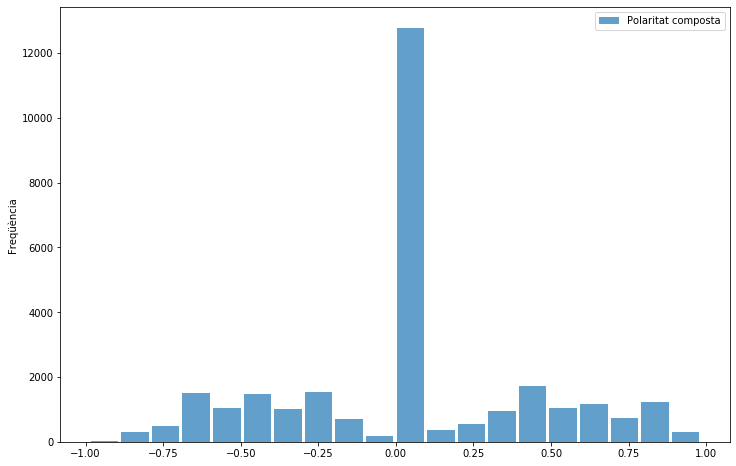

In [17]:
# Compound
df_vader[['compound']].plot.hist(bins=20, alpha=0.7,rwidth=0.9,figsize=(12, 8))


plt.ylabel ('Freqüència')
#plt.title('Histograma de la polaritat composta')

L=plt.legend()
L.get_texts()[0].set_text('Polaritat composta')

plt.show()

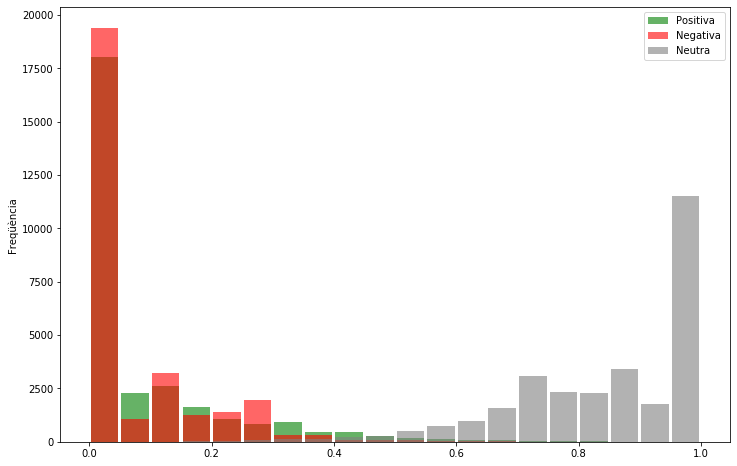

In [18]:

colors = ['g', 'r', 'grey']

ax = df_vader[['positive', 'negative', 'neutral']].plot.hist(bins=20, alpha=0.6, rwidth=0.9, color=colors, figsize=(12, 8))

plt.ylabel ('Freqüència')
#plt.title('Histogrames de la polaritat')

L=plt.legend()
L.get_texts()[0].set_text('Positiva')
L.get_texts()[1].set_text('Negativa')
L.get_texts()[2].set_text('Neutra')

plt.show()

## Adjacència


Generarem una taula d'adjacències per alimentar Gephi i obtenir el graf de comunitats. Amb aquest objectiu, creem un joc de dades només de interaccions de tipus retuit, on s'inclouen també els tuits citats.

### Nou joc de dades només de retuits


In [19]:
# Només retweets i tuits citats
df['retweeted_status.created_at'] = df['retweeted_status.created_at'].notnull().astype('int')
df_rt = df.loc[df['retweeted_status.created_at'] == 1]

# ELiminem les columnes innecessàries per l'anàlisi posterior
# Conservem les polaritats i les dates 
df_rt = df_rt[['created_at','user.screen_name', 'retweeted_status.user.screen_name', 
               'compound','positive', 'neutral','negative']]

# Renombrem
df_rt.rename(columns={'user.screen_name':'node1', 'retweeted_status.user.screen_name':'node2'}, inplace=True)
df_rt 

,created_at,node1,node2,compound,positive,neutral,negative
0,2021-05-01 08:11:01+00:00,futurehourz,BritneyHiatus,-0.6597,0.000,0.722,0.278
1,2021-05-01 08:10:01+00:00,Marjala2,BritneyHiatus,-0.7184,0.000,0.696,0.304
2,2021-05-01 08:09:34+00:00,meganyad,Caly314,0.4738,0.233,0.644,0.123
3,2021-05-01 08:08:45+00:00,KatarinaKemzova,LeanneSimmons,-0.3818,0.000,0.874,0.126
4,2021-05-01 08:08:37+00:00,Marjala2,BritneyHiatus,-0.2732,0.093,0.769,0.138
...,...,...,...,...,...,...,...
29192,2021-04-23 12:20:58+00:00,outtathisworl16,freebritplease,0.2881,0.093,0.907,0.000
29193,2021-04-23 12:20:39+00:00,DaveBM2020,BSNewsX,0.2732,0.100,0.900,0.000
29194,2021-04-23 12:19:44+00:00,outtathisworl16,SurpriseWitnes,0.0000,0.000,1.000,0.000
29195,2021-04-23 12:19:22+00:00,outtathisworl16,spears_central,-0.3818,0.000,0.874,0.126


#### Evolució temporal dels retuits

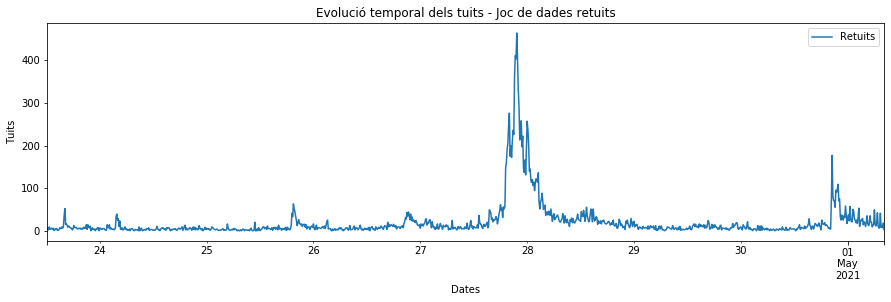

In [20]:
fig, ax = plt.subplots(figsize=(15, 4))

values = df_rt[["created_at"]]

ax = (
    values
          .resample(minuts, on='created_at')
          .count()
          .plot.line(ax=ax) 
)

plt.xlabel ('Dates')
plt.ylabel ('Tuits')
plt.title('Evolució temporal dels tuits - Joc de dades retuits')

L=plt.legend()
L.get_texts()[0].set_text('Retuits')

plt.show()


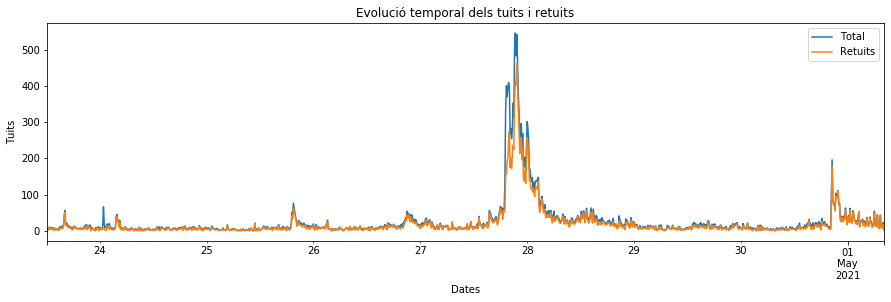

In [21]:
fig, ax = plt.subplots(figsize=(15, 4))

values = df[["created_at"]]

ax = (
    values
          .resample(minuts, on='created_at')
          .count()
          .plot.line(ax=ax) 
)

values = df_rt[["created_at"]]

ax = (values
          .resample(minuts, on='created_at')
          .count()
          .plot.line(ax=ax))

plt.xlabel ('Dates')
plt.ylabel ('Tuits')
plt.title('Evolució temporal dels tuits i retuits')

L=plt.legend()
L.get_texts()[0].set_text('Total')
L.get_texts()[1].set_text('Retuits')

plt.show()


### Usuaris més retuitadors

In [22]:
usuaris_retuitadors = df_rt['node1'].value_counts().rename_axis('users').to_frame('freq')
usuaris_retuitadors.reset_index(inplace=True)

keys=["nom d'usuari", 'interaccions']
print(tabulate(usuaris_retuitadors.head(10), headers=keys, tablefmt='psql', showindex=False))

+-----------------+----------------+
| nom d'usuari    |   interaccions |
|-----------------+----------------|
| FreeBritney___  |            290 |
| Melissa74520031 |            249 |
| BritneyRadical  |            201 |
| Nityalakshmi    |            180 |
| laxjonny_au     |            175 |
| maemaekitten    |            153 |
| outtathisworl16 |            143 |
| cinimodyeslah   |            142 |
| TylerAndsmile   |            138 |
| godneyspearsx   |            129 |
+-----------------+----------------+


#### Exportem la taula d'adjacències per Gephi

Eliminem les columnes innecessàries per Gephi i guardem l'arxiu com a csv,

In [23]:
df_adj = df_rt[['node1', 'node2']]
# df_adj.to_csv(r'retuits_britney.csv', index = False, header = False)

## Estudi de les comunitats resultants

### Usuaris segons l'agrupació

In [24]:
# Carguem el la taula amb el gray i la modularitat 
df_grup = pd.read_csv('graf_britney_nodes_TFM.csv', low_memory=False)
df_grup.head(5)

,Id,degree,modularity_class
0,futurehourz,1,0
1,BritneyHiatus,3359,0
2,Marjala2,2,0
3,meganyad,2,40
4,Caly314,11,40


In [25]:
# Revisem el nombre d'usuaris únics totals de la columna user.screen_name
print('Usuaris únics del graf:', len(df_grup))

Usuaris únics del graf: 7936


In [26]:
# Calculem el tamany de cada agrupació
tamany_grups = df_grup.groupby('modularity_class').modularity_class.count()
tamany_grups

modularity_class
0      2934
1         1
2        37
3         6
4        11
       ... 
216       2
217       2
218       2
219       2
220       2
Name: modularity_class, Length: 221, dtype: int64

Revisem quines són les que tenen més usuaris, ja que moltes són petites

In [27]:
comunitats = df_grup['modularity_class'].value_counts().rename_axis('comunitat').to_frame('tamany')
comunitats.reset_index(inplace=True)


print(tabulate(comunitats.head(15), headers='keys', tablefmt='psql', showindex=False))

+-------------+----------+
|   comunitat |   tamany |
|-------------+----------|
|           0 |     2934 |
|          36 |     1420 |
|          40 |     1169 |
|         128 |      412 |
|          42 |      253 |
|          63 |      249 |
|         157 |      156 |
|          95 |      144 |
|         165 |      132 |
|          48 |      128 |
|         124 |      101 |
|          22 |      100 |
|           2 |       37 |
|         168 |       35 |
|           6 |       29 |
+-------------+----------+


In [28]:
# Ens quedem amb les 10 més nombroses
comunitat = comunitats['comunitat'].loc[0:9]


## Histograma dels grups dels usuaris

Al joc de dades 'node1' tenim usuaris únics i la freqüència dels seus tuits. Ara també podem veure a quina classe pertanyen.

In [29]:
node1 = df_rt['node1'].value_counts().rename_axis('node1').to_frame('freq')
node1.reset_index(inplace=True)


# Afegim la freqüència
df_grup['freq'] = df_grup['Id'].map(node1.set_index('node1')['freq'])
df_grup.head(10)

,Id,degree,modularity_class,freq
0,futurehourz,1,0,1.0
1,BritneyHiatus,3359,0,29.0
2,Marjala2,2,0,9.0
3,meganyad,2,40,2.0
4,Caly314,11,40,1.0
5,KatarinaKemzova,5,40,5.0
6,LeanneSimmons,179,40,13.0
7,Arnolds_Life,75,40,72.0
8,aels_art,1,0,1.0
9,saoirse_winslet,35,40,37.0


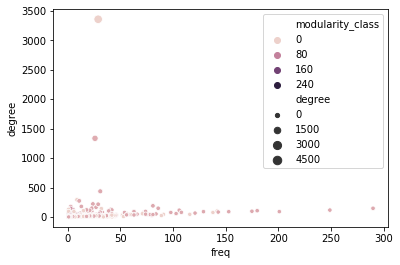

In [30]:
# Busquem una altra reprentació més gráfica
# http://seaborn.pydata.org/tutorial/categorical.html?highlight=bar%20plot

sns.scatterplot(data = df_grup, x = "freq", y = "degree", hue = 'modularity_class', size = 'degree')

plt.show()

### Joc de dades amb les 10 comunitats més nombroses

Ens quedem amb les 10 primeres

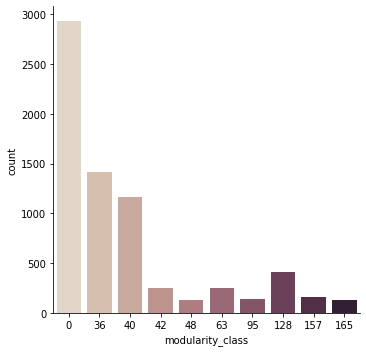

In [31]:
mask = df_grup['modularity_class'].isin(comunitat)
df_grup_10 = df_grup[mask]

sns.catplot(x="modularity_class", kind="count", palette="ch:.25", data=df_grup_10)

plt.show()

In [32]:
df_grup_10['modularity_class'] = df_grup_10['modularity_class'].map(str)
df_grup_10.head(10)

C:\Users\lula-\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Id,degree,modularity_class,freq
0,futurehourz,1,0,1.0
1,BritneyHiatus,3359,0,29.0
2,Marjala2,2,0,9.0
3,meganyad,2,40,2.0
4,Caly314,11,40,1.0
5,KatarinaKemzova,5,40,5.0
6,LeanneSimmons,179,40,13.0
7,Arnolds_Life,75,40,72.0
8,aels_art,1,0,1.0
9,saoirse_winslet,35,40,37.0


## Polaridad per comunitats

#### Retuits amb polaritat VADER

Afegim la modularitat al joc de dades que conté la polaritat.

In [33]:
df_rt['class'] = df_rt ['node1'].map(df_grup.set_index('Id')['modularity_class'])
df_rt.head(5)

,created_at,node1,node2,compound,positive,neutral,negative,class
0,2021-05-01 08:11:01+00:00,futurehourz,BritneyHiatus,-0.6597,0.000,0.722,0.278,0
1,2021-05-01 08:10:01+00:00,Marjala2,BritneyHiatus,-0.7184,0.000,0.696,0.304,0
2,2021-05-01 08:09:34+00:00,meganyad,Caly314,0.4738,0.233,0.644,0.123,40
3,2021-05-01 08:08:45+00:00,KatarinaKemzova,LeanneSimmons,-0.3818,0.000,0.874,0.126,40
4,2021-05-01 08:08:37+00:00,Marjala2,BritneyHiatus,-0.2732,0.093,0.769,0.138,0


In [36]:
# De les 10 comunitats més grans fem la mitjana

mask = df_rt['class'].isin(comunitat)
df_rt_10 = df_rt[mask]

keys=["Comunitat", 'Composta', 'Positiva', 'Neutra', 'Negativa']
print(tabulate(df_rt_10.groupby('class').median(), headers=keys, tablefmt='psql'))



+-------------+------------+------------+----------+------------+
|   Comunitat |   Composta |   Positiva |   Neutra |   Negativa |
|-------------+------------+------------+----------+------------|
|           0 |     0      |      0     |    0.88  |          0 |
|          36 |     0      |      0     |    0.915 |          0 |
|          40 |     0      |      0     |    0.865 |          0 |
|          42 |     0      |      0     |    0.895 |          0 |
|          48 |     0      |      0     |    1     |          0 |
|          63 |     0      |      0     |    0.915 |          0 |
|          95 |     0      |      0.085 |    0.833 |          0 |
|         128 |     0.4215 |      0.128 |    0.872 |          0 |
|         157 |     0.6661 |      0.175 |    0.825 |          0 |
|         165 |     0      |      0     |    1     |          0 |
+-------------+------------+------------+----------+------------+


### Distribució segons les classes

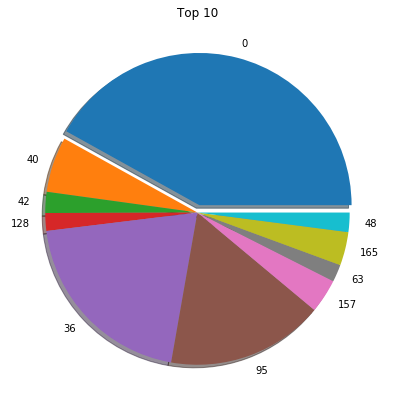

In [37]:
classes_10 = df_grup_10['modularity_class'].unique().tolist()

fig = plt.figure(figsize =(15, 7))
explode = (0.05, 0, 0, 0, 0, 0,0,0,0,0)  

plt.pie(df_grup_10.groupby(['modularity_class']).size(), labels = classes_10,  explode=explode, shadow=True)

plt.title('Top 10')

plt.show()

### Evolució temporal per classes - comunitats


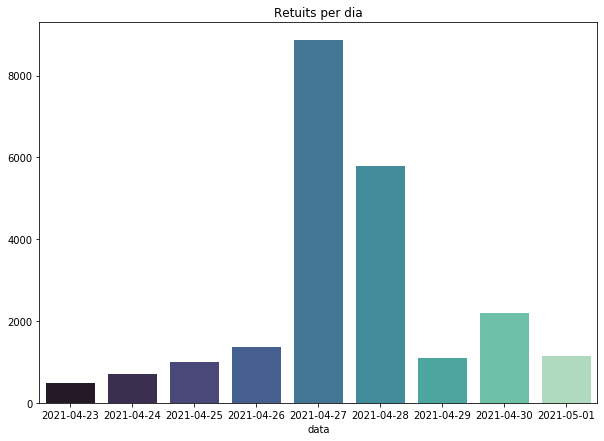

In [38]:
df_rt['data'] = pd.to_datetime(df['created_at']).dt.date

result = df_rt.groupby(['data']).size()

fig = plt.figure(figsize =(10, 7))

sns.barplot(x = result.index, y = result.values, palette= 'mako').set_title("Retuits per dia")

plt.show()

In [39]:
# Agrupem les dades 
df_rt_10['data'] = pd.to_datetime(df_rt_10['created_at']).dt.date
df_rt_date_class = df_rt_10.groupby(['data', 'class']).size().unstack(fill_value=0)

print (df_rt_date_class )

class        0     36    40   42   48   63   95   128  157  165
data                                                           
2021-04-23    62    14   407    0    0    1    3    2    1    0
2021-04-24   113     6   520   10    0    9    1    1    1    0
2021-04-25   212    10   695    3    0   13    1    4    1    0
2021-04-26   422    19   876   11    2    2    5    4    3    0
2021-04-27  3890  1208  2651   82  125  310  149   31   82   72
2021-04-28  2189   879  1363  233   34  174   83  428  103   50
2021-04-29   302    64   532   31    8   12    5    7    3   28
2021-04-30  1310    49   638   15    3   16   10   13    3   11
2021-05-01   680    24   306   31    0    4    5    8    1    0


C:\Users\lula-\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


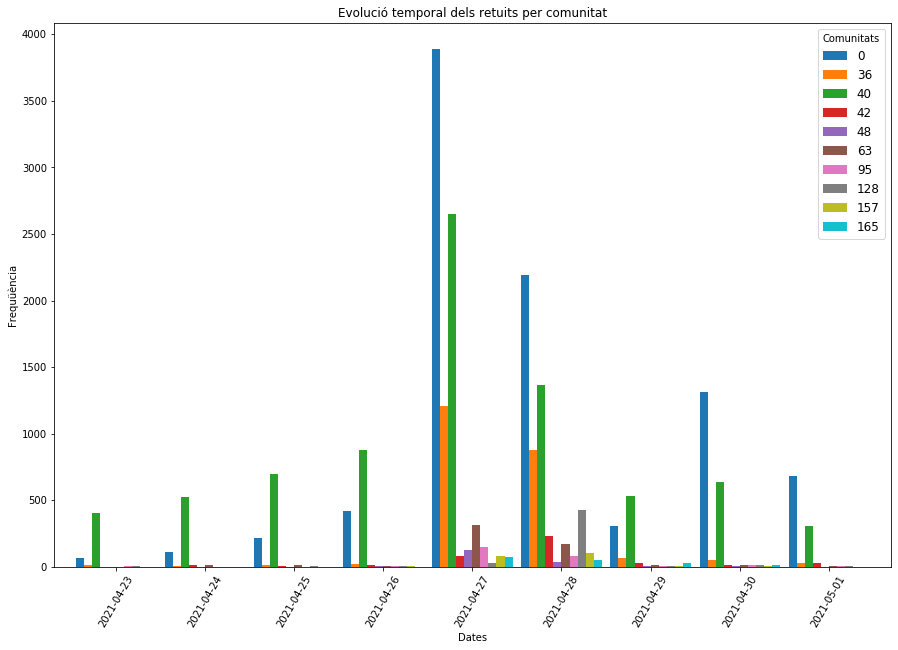

In [40]:
#g=sns.catplot(data=df_rt_10,kind='count',x='data', hue='class', palette= 'Paired' )

df_rt_date_class.plot.bar(figsize=(15, 10), width=.9)
plt.xlabel ('Dates')
plt.ylabel ('Frequüència')
plt.title('Evolució temporal dels retuits per comunitat')

L=plt.legend(fontsize='large',title="Comunitats", fancybox=True)
plt.xticks(rotation=60)
plt.show()

### Usuaris retuitats i retuitadors per classe

In [41]:
usuaris_retuitats['class'] = usuaris_retuitats ['users'].map(df_grup.set_index('Id')['modularity_class'])
usuaris_retuitadors['class'] = usuaris_retuitadors ['users'].map(df_grup.set_index('Id')['modularity_class'])
keys=["nom d'usuari", 'cops retuitats', 'comunitat']
print(tabulate(usuaris_retuitats.head(25), headers=keys, tablefmt='psql', showindex=False))

+-----------------+------------------+-------------+
| nom d'usuari    |   cops retuitats |   comunitat |
|-----------------+------------------+-------------|
| BritneyHiatus   |             6624 |           0 |
| JourneyOctobers |             1610 |          36 |
| popcultnmore    |              683 |          40 |
| PopBase         |              596 |         128 |
| unusuaIbritney  |              437 |          36 |
| TheSpearsRoom   |              429 |           0 |
| he_plays_sitar  |              337 |          40 |
| pieceofandy     |              302 |          42 |
| BritneyGoc      |              288 |          40 |
| brunolovesbrit  |              285 |          40 |
| godneyicon      |              269 |          36 |
| MikeSington     |              258 |          42 |
| BritneyLawArmy  |              255 |          40 |
| LeanneSimmons   |              255 |          40 |
| defnoodles      |              252 |         157 |
| jackhardwick93  |              246 |        

In [42]:
keys=["nom d'usuari", 'retuits fets', 'comunitat']
print(tabulate(usuaris_retuitadors.head(25), headers=keys, tablefmt='psql', showindex=False))

+-----------------+----------------+-------------+
| nom d'usuari    |   retuits fets |   comunitat |
|-----------------+----------------+-------------|
| FreeBritney___  |            290 |          40 |
| Melissa74520031 |            249 |          40 |
| BritneyRadical  |            201 |          40 |
| Nityalakshmi    |            180 |          40 |
| laxjonny_au     |            175 |          40 |
| maemaekitten    |            153 |          40 |
| outtathisworl16 |            143 |          40 |
| cinimodyeslah   |            142 |           0 |
| TylerAndsmile   |            138 |           0 |
| godneyspearsx   |            129 |          40 |
| amandaabmj      |            121 |          40 |
| j70446263       |            116 |           0 |
| tmcon1376       |            108 |          40 |
| biblexcharlotte |            106 |          40 |
| BMartinsReal    |            103 |          40 |
| AmandineZing    |            103 |          40 |
| Janaucy         |            

In [43]:
keys=["comunitat", 'retuits fets']
comunitats_retuitador = usuaris_retuitadors.groupby(['class']).sum().sort_values(by='freq', ascending=False).head(15)
comunitats_retuitador.reset_index(inplace=True)
print(tabulate(comunitats_retuitador, headers=keys, tablefmt='psql',showindex=False))

+-------------+----------------+
|   comunitat |   retuits fets |
|-------------+----------------|
|           0 |           9180 |
|          40 |           7988 |
|          36 |           2273 |
|          63 |            541 |
|         128 |            498 |
|          42 |            416 |
|          95 |            262 |
|         157 |            198 |
|          48 |            172 |
|         124 |            164 |
|         165 |            161 |
|          22 |            157 |
|           2 |             37 |
|         168 |             37 |
|         156 |             30 |
+-------------+----------------+


- La classe 0 en té 2934 i ha fet 9180 retuits.
- La classe 40 té 1169 membres i ha fet 7988 retuits.

- La 36 en té 1420 i ha fet 2273 retuits.
- La 63 en té 249 i ha fet 541 retuits.


In [44]:
mitja = usuaris_retuitadors.groupby(['class'])['freq'].mean().to_frame('mitjana')
contador = usuaris_retuitadors.groupby(['class'])['freq'].sum().to_frame('contador')


comunitats_retuitador = pd.merge(mitja, contador, on='class', how='right')
comunitats_retuitador.reset_index(inplace=True)
comunitats_retuitador.head(5)

,class,mitjana,contador
0,0,3.20979,9180
1,1,1.00000,1
2,2,1.00000,37
3,3,1.00000,5
4,4,1.20000,12


In [45]:

keys=["comunitat",'mitjana','retuits']
print(tabulate(comunitats_retuitador.sort_values(by='mitjana', ascending=False).head(20), 
               headers=keys, tablefmt='psql',showindex=False))

+-------------+-----------+-----------+
|   comunitat |   mitjana |   retuits |
|-------------+-----------+-----------|
|         156 |  15       |        30 |
|          40 |   7.74782 |      7988 |
|           0 |   3.20979 |      9180 |
|          70 |   3       |         3 |
|         141 |   2.625   |        21 |
|          63 |   2.2636  |       541 |
|          20 |   2       |         4 |
|         116 |   2       |         4 |
|         129 |   2       |         2 |
|          98 |   2       |        28 |
|         148 |   2       |         4 |
|         155 |   2       |         2 |
|          64 |   2       |         4 |
|         175 |   2       |         4 |
|         188 |   2       |         2 |
|          35 |   2       |         2 |
|         172 |   2       |         2 |
|           5 |   2       |         2 |
|          95 |   1.84507 |       262 |
|           8 |   1.75    |         7 |
+-------------+-----------+-----------+


In [46]:
keys=["comunitat",'mitjana','retuits']
print(tabulate(comunitats_retuitador.sort_values(by='contador', ascending=False).head(20), 
               headers=keys, tablefmt='psql',showindex=False))

+-------------+-----------+-----------+
|   comunitat |   mitjana |   retuits |
|-------------+-----------+-----------|
|           0 |   3.20979 |      9180 |
|          40 |   7.74782 |      7988 |
|          36 |   1.60636 |      2273 |
|          63 |   2.2636  |       541 |
|         128 |   1.2176  |       498 |
|          42 |   1.68421 |       416 |
|          95 |   1.84507 |       262 |
|         157 |   1.27742 |       198 |
|          48 |   1.36508 |       172 |
|         124 |   1.62376 |       164 |
|         165 |   1.22901 |       161 |
|          22 |   1.65263 |       157 |
|           2 |   1       |        37 |
|         168 |   1.08824 |        37 |
|         156 |  15       |        30 |
|          98 |   2       |        28 |
|           6 |   1       |        28 |
|          18 |   1.08696 |        25 |
|          10 |   1       |        22 |
|         141 |   2.625   |        21 |
+-------------+-----------+-----------+


## Britney als comptes de tw

Busquem si els noms d'usuaris tenen fan servir el nom Britney d'alguna forma.

In [47]:
# Recuperem el camps del nom d'usuari i de la descripció. 
# Hi ha altres camps on podriem buscar, com el nom o la localització
df_britney = df [['user.screen_name','user.description']]

# Descartem duplicats
df_britney = df_britney.drop_duplicates('user.screen_name')

# Afegim la classe
df_britney['class'] = df_britney['user.screen_name'].map(df_grup.set_index('Id')['modularity_class'])
df_britney.head(5)

,user.screen_name,user.description,class
0,futurehourz,this year our official stan list is: miley cyr...,0.0
1,Marjala2,NaN,0.0
2,meganyad,I’m here 😁,40.0
3,KatarinaKemzova,NaN,40.0
8,aels_art,A french artist! I'm currently working on post...,0.0


In [48]:
# Emmagatzemem si em trobat o no Britney al nom
df_britney['Britney'] = np.where(df_britney['user.screen_name'].str.contains('Britney',case=False), 1, 0)


# Emmagatzemem si em trobat o no Britney o #freebrinet a la descripció
df_britney['des.Britney'] = np.where(df_britney['user.description'].str.contains('Britney',case=False), 1, 0)
df_britney['des.FreeBritney'] = np.where(df_britney['user.description'].str.contains('#freebritney',case=False), 1, 0)

df_britney.head(5)

,user.screen_name,user.description,class,Britney,des.Britney,des.FreeBritney
0,futurehourz,this year our official stan list is: miley cyr...,0.0,0,0,0
1,Marjala2,NaN,0.0,0,1,1
2,meganyad,I’m here 😁,40.0,0,0,0
3,KatarinaKemzova,NaN,40.0,0,1,1
8,aels_art,A french artist! I'm currently working on post...,0.0,0,0,0


### Usuaris amb Britney o #freebrinet per comunitat

In [49]:
# Agrupem per classe i fem la suma

df_britney.groupby(['class']).sum()

,Britney,des.Britney,des.FreeBritney
class,,,
0.0,86,792,572
1.0,0,0,0
2.0,0,3,3
3.0,0,2,2
4.0,0,5,5
...,...,...,...
216.0,0,1,1
217.0,0,0,0
218.0,0,0,0


In [50]:
# Ens quedem amb les 10 comunitats més grans
mask = df_britney['class'].isin(comunitat)
df_britney_10 = df_britney[mask]

# Agrupem
df_comunitats = df_britney_10.groupby(['class']).sum()

# Calculem percentatges
df_comunitats['per.Britney'] = df_comunitats['des.Britney']/df_comunitats['des.Britney'].sum()
df_comunitats['per.FreeBritney'] = df_comunitats['des.FreeBritney']/df_comunitats['des.FreeBritney'].sum()
df_comunitats['num_members'] = df_britney_10['class'].value_counts().to_frame('freq')
df_comunitats

,Britney,des.Britney,des.FreeBritney,per.Britney,per.FreeBritney,num_members
class,,,,,,
0.0,86,792,572,0.425121,0.402533,2931
36.0,5,241,213,0.129361,0.149894,1417
40.0,54,489,376,0.262480,0.264602,1136
42.0,2,61,48,0.032743,0.033779,251
48.0,0,26,24,0.013956,0.016890,127
63.0,10,91,66,0.048846,0.046446,249
95.0,5,50,29,0.026838,0.020408,144
128.0,6,61,49,0.032743,0.034483,412
157.0,0,28,24,0.015030,0.016890,156


### Localització

Usuaris que han omplert la localització

In [51]:
df_location = df[['user.screen_name', 'user.location']].dropna()
df_location = df_location.drop_duplicates(subset=['user.screen_name'])
df_location

,user.screen_name,user.location
1,Marjala2,"Santa Maria, CA"
3,KatarinaKemzova,Česká republika
8,aels_art,France
9,saoirse_winslet,🇵🇭 • earth
13,biblexcharlotte,hell
...,...,...
29160,XUMB_ANYOU,"Massachusetts, USA"
29162,HollywoodBlvd1,In Hollywood/On Hollywood
29167,AdolfoRT,"Santiago de Compostela, Spain"
29185,wildesttiptoes,UK | She/Her


### Antiguitat dels usuaris

La data de creació dels comptes també ens dona informació, i pot fer-se servir per recisar si un compte s'ha creat per una campanya de suport o assatjament.

In [52]:

# Afegim la classe al joc de dades d'usuaris interessants

df_users_int['comunitat'] = df_users_int['user.screen_name'].map(df_grup.set_index('Id')['modularity_class'])
df_users_int_10 = df_users_int[mask]

# Ens quedem només mab la data
df_users_int_10['any'] = df_users_int_10['user.created_at'].dt.year


C:\Users\lula-\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


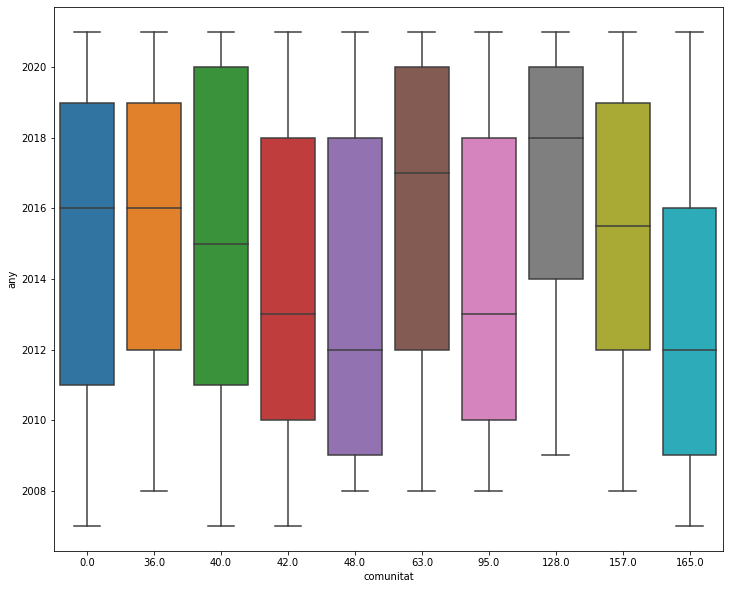

In [53]:
# https://seaborn.pydata.org/generated/seaborn.boxplot.html
fig = plt.figure(figsize =(12, 10))

ax = sns.boxplot(x='comunitat', y='any', data=df_users_int_10)

# show plot
plt.show()

